# 移动平均线指标

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

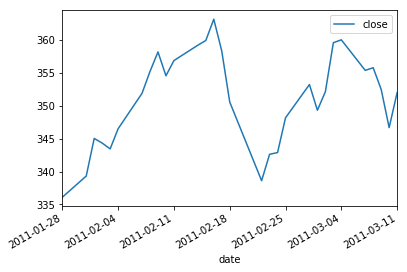

In [2]:
data = pd.read_csv('aapl.csv', header=None, usecols=[1, 6], names=['date', 'close'])
# 整理时间字段
def func(d):
    s = '-'.join(d.split('-')[::-1]) 
    return pd.to_datetime(s)
data['date'] = data['date'].apply(func)
data.plot(x='date', y='close')

In [7]:
# 计算5日移动平均线
ma5 = np.zeros(len(data) - 4)
for i in range(ma5.size):
    ma5[i] = np.mean(data['close'][i:i+5])

ma5 = pd.Series(ma5, index=np.arange(4, 30))
data['ma5'] = ma5
data.plot(x='date', y=['close', 'ma5'])

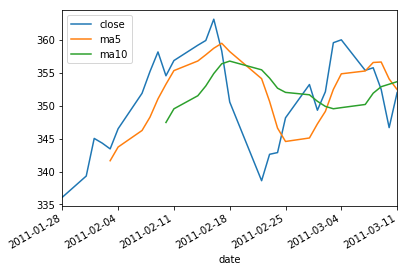

In [8]:
# 计算10日移动平均线
ma10 = np.zeros(len(data) - 9)
for i in range(ma10.size):
    ma10[i] = np.mean(data['close'][i:i+10])

ma10 = pd.Series(ma10, index=np.arange(9, 30))
data['ma10'] = ma10
data.plot(x='date', y=['close', 'ma5', 'ma10'])

## 布林带代码实现

In [21]:
data.plot(x='date', y=['close', 'ma5'])
# 计算上轨与下轨
stds = np.zeros(len(data) - 4)
for i in range(stds.size):
    stds[i] = np.std(data['close'][i:i+5])

upper = data['ma5'][4:] + 2 * stds
lower = data['ma5'][4:] - 2 * stds
# matplotlib
plt.plot(data['date'][4:], upper, color='red', linewidth=0.5)
plt.plot(data['date'][4:], lower, color='red', linewidth=0.5)
plt.fill_between(data['date'][4:], upper, lower, upper>lower, color='red', alpha=0.3)
